# Global Income Prediction

## Imports

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

## Data Preparation

In [ ]:
# CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
# DATA_DIR = os.path.join(CURRENT_DIR, 'data')
TRAIN_DATA_FILE = os.path.join('/data', 'adult.data')

In [ ]:
print(TRAIN_DATA_FILE)

/data/adult.data


In [ ]:
# Organize data into respective categories
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [ ]:
def read_dataset(path):
    return pd.read_csv(
        path,
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    )

def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income_class'] = data.income_class.str.rstrip('.').astype('category')
    
    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('final_weight', axis=1)
    
    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()
    
    # Binarize target variable (>50K == 1 and <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    return data

In [ ]:
data = clean_dataset(read_dataset(TRAIN_DATA_FILE))


print("Percent of the positive classes in the training data: {:.2%}".format(np.mean(data.income_class)))

In [ ]:
# Alternatively, we can upload adult.data onto colab and run the following code
data = clean_dataset(pd.read_csv(
        'adult.data',
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    ))

In [ ]:
data.info()

NameError: ignored

In [ ]:
data.head()

NameError: ignored

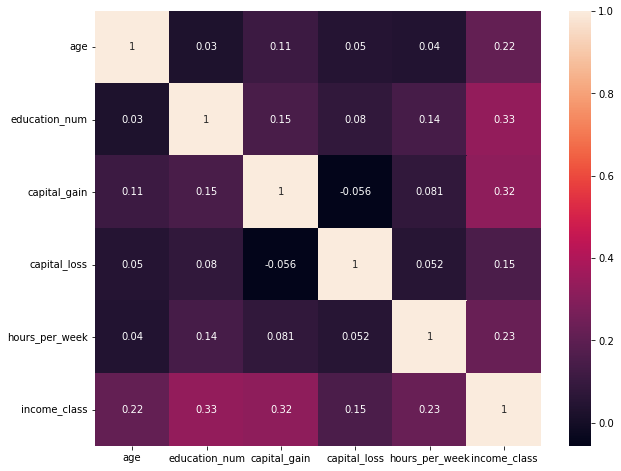

In [ ]:
# Generate heap map for df
fig, ax = plt.subplots(figsize=(10, 8))
dataplot = sns.heatmap(data.corr(),annot=True)
plt.show()

## Linear Model

<div>With Only numerical features</div>
<div> We can start off with only a couple of numerical features, which is easy to apply and don't require extra data transformations.
</div>


### Logistic Regression with 3 features

In [ ]:
# Select 3 numerical features for our model
features = [
    'age',
    'education_num',
    'hours_per_week'
]

In [ ]:
# data processing - dropping other data column

X1 = data.copy(deep=True)

for i in X1:
    if i not in features:
        # print(i)
        X1 = X1.drop([i], axis =1)
        
y1 = data.income_class
X1

In [ ]:
#perform train and test data splits using y and X
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

In [ ]:
# Standardize data to make models coeficients interpratable. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
logistic_regression = LogisticRegression()

# instantiate Logistic Regression model
logistic_regression.fit(X_train, y_train)

In [ ]:
# Predict the results
pred = logistic_regression.predict(X_test)


In [ ]:
print('Coefficients: \n', logistic_regression.coef_)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred))
print( 'MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('\n')

In [ ]:
plt.title('Confusion Matrix for Logistic Regression')
cm_lr = confusion_matrix(y_test,pred)
sns.heatmap(cm_lr,annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print('\nClassification Report of Logistic Regression\n')
print(classification_report(y_test, pred))

print("Precision score of Logistic Regression:", precision_score(y_test, pred, average = 'weighted'))
print("Recall score of Logistic Regression:", recall_score(y_test, pred, average = 'weighted'))
print("F1 score of Logistic Regression:", f1_score(y_test, pred, average = 'weighted'))

In [ ]:
from sklearn.metrics import plot_roc_curve
# Plot ROC curve
plot_roc_curve(logistic_regression, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

### Logistic Regression Model with 5 Features

In [ ]:
# Select 5 Features for aour prediciton model.
features = [
    'age',
    'education_num',
    'hours_per_week',
    'capital_gain',
    'capital_loss'
]

In [ ]:
# data processing - dropping other data column

X2 = data.copy(deep=True)

for i in X2:
    if i not in features:
        # print(i)
        X2 = X2.drop([i], axis =1)
        
y2 = data.income_class
X2

In [ ]:
# Handle N.A data type - replacing with 0. 
X2 = X2[features].fillna(0).astype(float)

In [ ]:
#perform train and test data splits using y and X
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

In [ ]:
# Standardize data to make models coeficients interpratable. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logistic_regression = LogisticRegression()

# instantiate Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Predict the results
pred = logistic_regression.predict(X_test)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred))
print( 'MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('\n')

In [ ]:
plt.title('Confusion Matrix for Logistic Regression')
cm_lr = confusion_matrix(y_test,pred)
sns.heatmap(cm_lr,annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve
# Plot ROC curve
plot_roc_curve(logistic_regression, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

In [ ]:
print('\nClassification Report of Logistic Regression\n')
print(classification_report(y_test, pred))

print("Precision score of Logistic Regression:", precision_score(y_test, pred, average = 'weighted'))
print("Recall score of Logistic Regression:", recall_score(y_test, pred, average = 'weighted'))
print("F1 score of Logistic Regression:", f1_score(y_test, pred, average = 'weighted'))

### Adding Categorial Features to the Model

<div>In order to consider the categorical features, we use one hot encoder to transform categorical features to binary variables.</div>

In [ ]:
def get_categorical_columns(data, cat_columns=None, fillna=True):
    if cat_columns is None:
        cat_data = data.select_dtypes('category')
    else:
        cat_data = data[cat_columns]

    if fillna:
        for colname, series in cat_data.iteritems():
            if 'Other' not in series.cat.categories:
                series = series.cat.add_categories(['Other'])

            cat_data[colname] = series.fillna('Other')
            
    return cat_data

def features_with_one_hot_encoded_categories(data, cat_columns=None, fillna=True):
    cat_data = get_categorical_columns(data, cat_columns, fillna)
    one_hot_data = pd.get_dummies(cat_data)
    df = pd.concat([data, one_hot_data], axis=1)

    features = [
        'age',
        'education_num',
        'hours_per_week',
        'capital_gain',
        'capital_loss',
    ] + one_hot_data.columns.tolist()

    X = df[features].fillna(0).values.astype(float)
    y = df[target_column].values
    
    return X, y

In [ ]:
train_data = data.copy(deep=True)
X3, y3 = features_with_one_hot_encoded_categories(train_data)


In [ ]:
#perform train and test data splits using y and X
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=1)
# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

In [ ]:
# Standardize data to make models coeficients interpratable. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logistic_regression = LogisticRegression()

# instantiate Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Predict the results
pred = logistic_regression.predict(X_test)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred))
print( 'MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('\n')

R^2: 0.1556792237442921
MAE: 0.15721649484536082
RMSE: 0.3965053528583956
MSE: 0.15721649484536082




In [ ]:
print('\nClassification Report of Logistic Regression\n')
print(classification_report(y_test, pred))

print("Precision score of Logistic Regression:", precision_score(y_test, pred, average = 'weighted'))
print("Recall score of Logistic Regression:", recall_score(y_test, pred, average = 'weighted'))
print("F1 score of Logistic Regression:", f1_score(y_test, pred, average = 'weighted'))


Classification Report of Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4380
           1       0.73      0.59      0.65      1440

    accuracy                           0.84      5820
   macro avg       0.80      0.76      0.77      5820
weighted avg       0.84      0.84      0.84      5820

Precision score of Logistic Regression: 0.8358198945046201
Recall score of Logistic Regression: 0.8427835051546392
F1 score of Logistic Regression: 0.8368278370301496


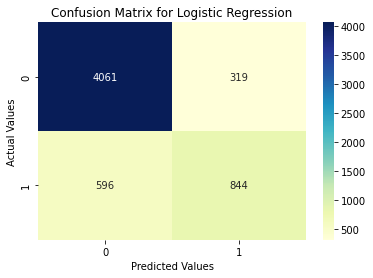

In [ ]:
plt.title('Confusion Matrix for Logistic Regression')
cm_lr = confusion_matrix(y_test,pred)
sns.heatmap(cm_lr,annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


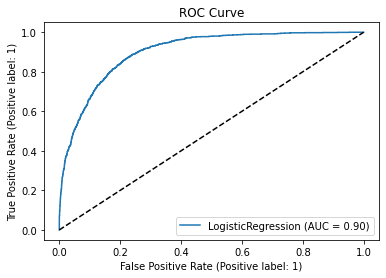

In [ ]:
from sklearn.metrics import plot_roc_curve
# Plot ROC curve
plot_roc_curve(logistic_regression, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

## Support Vector Machine

### SVM with 3 features

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X1.sample(n = 100, replace = False), 
                                                                    y1.sample(n = 100, replace = False), 
                                                                    test_size=0.2, 
                                                                    random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Creating various SVC models to tune the hyperparameters
# Parameters used for hypertuning
parameters = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [1, 2, 3, 4]}

# Initializes Grid with the classifier used, and the parameters to hypertune
grid = GridSearchCV(SVC(), parameters)

# Trains the models with training data and finds best model
grid.fit(X_train_svm, y_train_svm)

# Hypertuned parameters along with the resulting accuracy
print(grid.best_params_)

{'C': 0.1, 'degree': 1, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_svm = grid.predict(np.array(X_test_svm))
accuracy_score(y_pred_svm, y_test_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


0.75

In [ ]:
# Works if the kernel is linear
importance = grid.best_estimator_.coef_[0]
feature_names = grid.best_estimator_.feature_names_in_
for i,v in enumerate(importance):
    print('Feature: ' + feature_names[i] + ', Score: %.5f' % v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

AttributeError: ignored

### SVM with 5 features

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X2.sample(n = 100, replace = False), 
                                                                    y2.sample(n = 100, replace = False), 
                                                                    test_size=0.2, 
                                                                    random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Creating various SVC models to tune the hyperparameters
# Parameters used for hypertuning
parameters = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [1, 2, 3, 4]}

# Initializes Grid with the classifier used, and the parameters to hypertune
grid = GridSearchCV(SVC(), parameters)

# Trains the models with training data and finds best model
grid.fit(X_train_svm, y_train_svm)

# Hypertuned parameters along with the resulting accuracy
print(grid.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_svm = grid.predict(np.array(X_test_svm))
accuracy_score(y_pred_svm, y_test_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


0.75

In [ ]:
# Works if the kernel is linear
importance = grid.best_estimator_.coef_[0]
feature_names = grid.best_estimator_.feature_names_in_
for i,v in enumerate(importance):
    print('Feature: ' + feature_names[i] + ', Score: %.5f' % v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

AttributeError: ignored